# HW 2 - PART 2

#Paula Reyes Daza


The database contains many tables / relations, but we will be mainly using 2 relations: Salaries and Teams. The schema (description of the fields in the tables) are given below. Not all columns/fields are relevant for this homework, and we will pointout relevant fields as we walk through the assignement. 

Salaries table
---------------
- yearID         Year
- teamID         Team
- lgID           League
- playerID       Player ID code
- salary         Salary


Teams Table
-----------
- yearID         Year
- lgID           League
- teamID         Team
- franchID       Franchise (links to TeamsFranchise table)
- divID          Team's division
- Rank           Position in final standings
- G              Games played
- GHome          Games played at home
- W              Wins
- L              Losses
- DivWin         Division Winner (Y or N)
- WCWin          Wild Card Winner (Y or N)
- LgWin          League Champion(Y or N)
- WSWin          World Series Winner (Y or N)
- R              Runs scored
- AB             At bats
- H              Hits by batters
- 2B             Doubles
- 3B             Triples
- HR             Homeruns by batters
- BB             Walks by batters
- SO             Strikeouts by batters
- SB             Stolen bases
- CS             Caught stealing
- HBP            Batters hit by pitch
- SF             Sacrifice flies
- RA             Opponents runs scored
- ER             Earned runs allowed
- ERA            Earned run average
- CG             Complete games
- SHO            Shutouts
- SV             Saves
- IPOuts         Outs Pitched (innings pitched x 3)
- HA             Hits allowed
- HRA            Homeruns allowed
- BBA            Walks allowed
- SOA            Strikeouts by pitchers
- E              Errors
- DP             Double Plays
- FP             Fielding  percentage
- name           Team's full name
- park           Name of team's home ballpark
- attendance     Home attendance total
- BPF            Three-year park factor for batters
- PPF            Three-year park factor for pitchers
- teamIDBR       Team ID used by Baseball Reference website
- teamIDlahman45 Team ID used in Lahman database version 4.5
- teamIDretro    Team ID used by Retrosheet

In [3]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)  # connect to database and ingest the tables 

# lets run a query to look at the data
salary_query = "SELECT yearID, sum(salary) as total_payroll FROM Salaries WHERE lgID == 'AL' GROUP BY yearID"

team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()


,yearID,total_payroll
0,1985,134401120.0
1,1986,157716444.0
2,1987,136088747.0
3,1988,157049812.0
4,1989,188771688.0


## Analysis

We want to understand how efficient teams have been historically at spending money and getting wins in return. In the case of Moneyball, one would expect that Oakland was not much more efficient than other teams in their spending before 2000, were much more efficient (they made a movie about it after all) between 2000 and 2005, and by then other teams may have caught up. Lets see how this is reflected in the data we have.

### Relation Creation

Using SQL compute a new relation that contains a subset of fields of interest to help us compute further statisitcs of interest.  We neeed to think about the type of join used as it determines how missing data is handled. In the code below, a SQL statment is executed to create the new relation jusing a join between the two tables; 




In [2]:
createTable_query = "CREATE TABLE statsTbl AS SELECT \
Salaries.yearID, Teams.teamID, Teams.name, Salaries.salary, Teams.G, Teams.W, Teams.L \
FROM Salaries  \
JOIN Teams \
ON Salaries.yearID=Teams.yearID AND Salaries.teamID=Teams.teamID \
WHERE Salaries.lgID=='AL' ;"

cursor = conn.cursor()
cursor.execute(createTable_query)
conn.commit()

# if you run this mulitple times, you may see an error stating "statsTbl already exists". This error message can be ignored. 

In [4]:
query = "select * from statsTbl;"

result = pandas.read_sql(query, conn)
result.head()


# As you can see, it generates a new table/relation which contains 7 fields:
# yearID
# teamID
# name
# salary
# G --> denotes the number of games
# W --> denotes the number of wins
# L --> denotes the number of losses

,yearID,teamID,name,salary,G,W,L
0,1985,BAL,Baltimore Orioles,625000.0,161,83,78
1,1985,BAL,Baltimore Orioles,480000.0,161,83,78
2,1985,BAL,Baltimore Orioles,437500.0,161,83,78
3,1985,BAL,Baltimore Orioles,512500.0,161,83,78
4,1985,BAL,Baltimore Orioles,375000.0,161,83,78
5,1985,BAL,Baltimore Orioles,641667.0,161,83,78
6,1985,BAL,Baltimore Orioles,450000.0,161,83,78
7,1985,BAL,Baltimore Orioles,483333.0,161,83,78
8,1985,BAL,Baltimore Orioles,725000.0,161,83,78
9,1985,BAL,Baltimore Orioles,1090000.0,161,83,78


Suppose we want to print the rows / entries for Oakland between 1988 - 1989. Hint: need to use a WHERE clause in the SQL query to filter out rows only for teamID="OAK"

In [3]:
query = "SELECT * FROM statsTbl WHERE teamID='OAK' AND yearID>=1988 AND yearID<=1989;"

result = pandas.read_sql(query, conn)
result.head()

,yearID,teamID,name,salary,G,W,L
0,1988,OAK,Oakland Athletics,495000.0,162,104,58
1,1988,OAK,Oakland Athletics,325000.0,162,104,58
2,1988,OAK,Oakland Athletics,550000.0,162,104,58
3,1988,OAK,Oakland Athletics,650000.0,162,104,58
4,1988,OAK,Oakland Athletics,100000.0,162,104,58


Suppose we want to print the year for which Oakland had the largest number of wins. Lets write that SQL query. 

In [4]:
query = "SELECT yearID, max(W) from statsTbl WHERE teamID='OAK';"

result = pandas.read_sql(query, conn)
result.head()

,yearID,max(W)
0,1988,104


Suppose we want to compute the total payroll for teamID='OAK' for the yearID='1988'. To do this, we must sum-up all the salaries for a given team for a given year. 

In [5]:
query = "SELECT teamID, yearID, SUM(salary) AS TotalSalary  \
FROM statsTbl  \
WHERE yearID='1988' AND teamID='OAK' \
GROUP BY teamID,yearID;"

result = pandas.read_sql(query, conn)
result.head()


,teamID,yearID,TotalSalary
0,OAK,1988,9690000.0


## Problem 1 

Using SQL, compute the result containing the total payroll and winning percentage (number of wins / number of games * 100) for each team (that is, for each teamID and yearID combination). 

Hint: Be sure to perform a groupby on the fields teamID and yearID



In [33]:
# W = Wins, G = Games played
question1 = "SELECT teamID, yearID, W, G, SUM(SALARY) AS Total_Payroll, (W*100/G) AS Winning_Percentage  \
FROM statsTbl \
GROUP BY teamID, yearID;"

result1 = pandas.read_sql(question1, conn)
result1.head(10)

# winning percentage (number of wins / number of games) * 100


,teamID,yearID,W,G,Total_Payroll,Winning_Percentage
0,ANA,1997,84,162,31135472.0,51
1,ANA,1998,85,162,41281000.0,52
2,ANA,1999,70,162,55388166.0,43
3,ANA,2000,82,162,51464167.0,50
4,ANA,2001,75,162,47535167.0,46
5,ANA,2002,99,162,61721667.0,61
6,ANA,2003,77,162,79031667.0,47
7,ANA,2004,92,162,100534667.0,56
8,BAL,1985,83,161,11560712.0,51
9,BAL,1986,73,162,13001258.0,45


## Problem 2

Write code to printout the teamID that had the highest WinningPercentage over total sepending (salaries). 

In [56]:
# W = Wins, G = Games played
question2 = "SELECT teamID, yearID, W, G, SUM(SALARY) AS Total_Payroll \
FROM statsTbl \
GROUP BY teamID, yearID;"

result2 = pandas.read_sql(question2, conn)
result2.head()

# winning percentage (number of wins / number of games) * 100

,teamID,yearID,W,G,Total_Payroll
0,ANA,1997,84,162,31135472.0
1,ANA,1998,85,162,41281000.0
2,ANA,1999,70,162,55388166.0
3,ANA,2000,82,162,51464167.0
4,ANA,2001,75,162,47535167.0


In [72]:
createTable_query = "CREATE TABLE mytable AS SELECT \
yearID, teamID, W, G, SUM(SALARY) as Total_Payroll, (W*100/G) AS Winning_Percentage \
FROM statstbl \
GROUP BY teamID, yearID;"

cursor = conn.cursor()
cursor.execute(createTable_query)
conn.commit()


OperationalError: table mytable already exists

In [79]:
#see what the table I just created  ('mytable') looks like
question2_2 = "SELECT * \
FROM mytable \
GROUP BY yearID, teamID;"

result2 = pandas.read_sql(question2_2, conn)
result2.head()

,yearID,teamID,W,G,Total_Payroll,Winning_Percentage
0,1985,BAL,83,161,11560712.0,51
1,1985,BOS,81,163,10897560.0,49
2,1985,CAL,90,162,14427894.0,55
3,1985,CHA,85,163,9846178.0,52
4,1985,CLE,60,162,6551666.0,37


In [83]:
question2_answer = "SELECT teamID, MAX(Winning_Percentage/Total_Payroll) AS MAX_WinningPercentage_over_TotalSalaries from mytable"

result2_final = pandas.read_sql(question2_answer, conn)
result2_final.head()

,teamID,MAX_WinningPercentage_over_TotalSalaries
0,TEX,0.000052


## Problem 3

Write code to produce plots that illustrate the team's total spending (salaries) conditioned on time (from 1990-2014), specifically for teamID='OAK'.

In [96]:
#check to see what all the OAK entries are like
query = "SELECT * FROM statstbl WHERE teamID like 'OAK';"

OAK = pandas.read_sql(query, conn)
OAK.head(200)

,yearID,teamID,name,salary,G,W,L
0,1985,OAK,Oakland Athletics,107333.0,162,77,85
1,1985,OAK,Oakland Athletics,575000.0,162,77,85
2,1985,OAK,Oakland Athletics,60000.0,162,77,85
3,1985,OAK,Oakland Athletics,350000.0,162,77,85
4,1985,OAK,Oakland Athletics,141500.0,162,77,85
5,1985,OAK,Oakland Athletics,700000.0,162,77,85
6,1985,OAK,Oakland Athletics,305000.0,162,77,85
7,1985,OAK,Oakland Athletics,610000.0,162,77,85
8,1985,OAK,Oakland Athletics,425000.0,162,77,85
9,1985,OAK,Oakland Athletics,150000.0,162,77,85


In [131]:
createTable2_query = "CREATE TABLE mytableQ2 AS SELECT \
yearID, teamID, Total_Payroll \
FROM mytable WHERE teamID ='OAK' AND yearID>=1990 AND yearID<=2014;"


cursor = conn.cursor()
cursor.execute(createTable2_query)
conn.commit()


In [6]:
#see what the table I just created  ('mytable2') looks like
question3 = "SELECT * \
FROM mytableQ2 \
GROUP BY yearID"

result2 = pandas.read_sql(question3, conn)
result2.head()

,yearID,teamID,Total_Payroll
0,1990,OAK,19887501.0
1,1991,OAK,36999167.0
2,1992,OAK,41035000.0
3,1993,OAK,37812333.0
4,1994,OAK,34172500.0


In [10]:
#create a dataframe from the info on the table above in order to plot it
df = pandas.DataFrame(result2)

print df

    yearID teamID  Total_Payroll
0     1990    OAK     19887501.0
1     1991    OAK     36999167.0
2     1992    OAK     41035000.0
3     1993    OAK     37812333.0
4     1994    OAK     34172500.0
5     1995    OAK     37739225.0
6     1996    OAK     21243000.0
7     1997    OAK     24018500.0
8     1998    OAK     21303000.0
9     1999    OAK     24431833.0
10    2000    OAK     31971333.0
11    2001    OAK     33810750.0
12    2002    OAK     40004167.0
13    2003    OAK     50260834.0
14    2004    OAK     59425667.0
15    2005    OAK     55425762.0
16    2006    OAK     62243079.0
17    2007    OAK     79366940.0
18    2008    OAK     47967126.0
19    2009    OAK     61910000.0
20    2010    OAK     55254900.0
21    2011    OAK     66536500.0
22    2012    OAK     55372500.0
23    2013    OAK     60132500.0
24    2014    OAK     72408400.0


Text(0.5,1,u'Total Spending (Salaries) From 1990-2014')

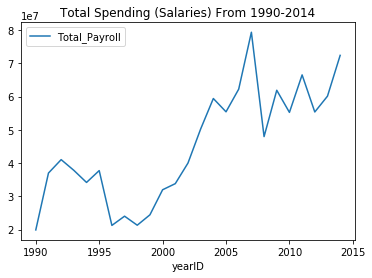

In [24]:
#Plot illustrating OAK's total spending (salaries) conditioned on time (from 1990-2014)
import matplotlib.pyplot as plt

df.plot (x='yearID',y='Total_Payroll')

plt.title ('Total Spending (Salaries) From 1990-2014')